#### 지도학습과 비지도학습 차이 회고

- 지도학습 : 타겟값을 알고 있는 데이터를 이용해 새로운 객체의 타겟 변수값을 예측할 수 있는 패턴을 찾아내는 것

- 비지도학습 : 타겟 변수에 신경쓰지 않고 데이터 집합에 있는 어떤 규칙성을 찾으려는 것

# 군집(clustering)

- 데이터에서 자연스럽게 분류되는 그룹을 찾아내는 개념
- 데이터셋을 비슷한 것끼리 클러스터(cluster)라는 그룹으로 나눔
- 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당(또는 예측)


비즈니스적 사고

- 미리 지정된 타겟 특징 없이 고객을 그룹화하는 등, 객체의 그룹을 찾아내려는 경우
 - 우리 고객들이 자연스럽게 어떤 그룹들로 분류되는가?
 - 우리 고객이 어떤 사람들인지 제대로 알고 있는가?
 - 자연스럽게 분류되는 고객들을 이해하면 더 나은 제품을 개발하고, 마케팅 프로모션을 강화하고, 판매 기법을 개선하고, 고객 서비스를 더욱 향상시킬 수 있을까?

군집(clustering) 알고리즘 종류

- K 평균 군집(K-means)
- 계층형 군집 : 병합적, 분할적
- DBSCAN

## k-평균 군집 (K-means)

- 주어진 데이터를 K개의 클러스터(cluster)로 묶는 알고리즘
- 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)을 찾음

- K-means 에서 평균은 중점이며, 군집(cluster)에 들어 있는 객체들은 각 차원별로 산술 평균값으로 표현
 - 일반적으로 중점은 군집에 있는 모든 사례가 가진 특징의 평균값

- K-means 에서 K는 데이터에서 찾아내려는 군집 수
 - 원하는 군집의 개수로 시작
 - 각 군집이 자신의 중점에 가까운 점들을 갖도록 군집의 중점을 다시 계산
 - 이 기법을 최근접 이웃 군집화라고 부르기도 함

K-means 단계

1. 클러스터(cluster)의 개수 K값 설정

2. 클러스터마다 초기 중심 설정(초기 중심은 각 학습 데이터가 자신이 속한 클러스터를 결정하는데 기준점)

3. 모든 데이터는 k개의 초기 중심까지 거리를 계산하고 가장 가까이에 있는 중심을 자기 클러스터의 중심이라 판단

4. 클러스터가 정해지면 각 클러스터의 평균(중심)을 구해 이를 새로운 중심으로 정함

5. 학습이 진행되면서 각 클러스터마다 최적의 중심으로 이동(중심 재계산)

In [ ]:
# !pip install mglearn

In [ ]:
# Windows 한글
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [15]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

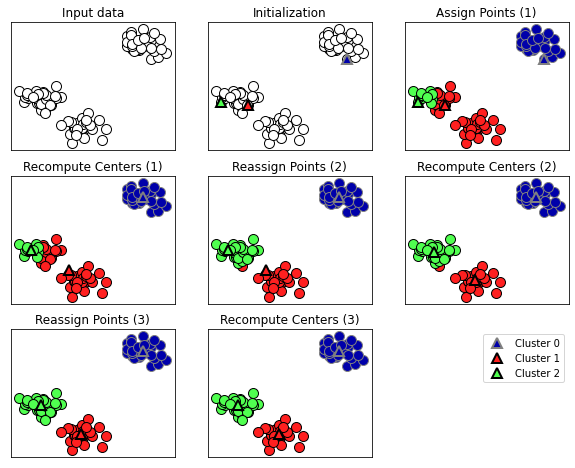

In [4]:
# K-means 알고리즘 과정(단계)
mglearn.plots.plot_kmeans_algorithm()

- 입력 데이터(Input data) : 삼각형은 클러스터 중심, 원은 데이터 포인트, 클러스터는 색으로 구분
- 초기화(Initialization) : 클러스터 중심으로 삼을 데이터 포인트 3개를 무작위로 초기화
- 반복 : 클러스터 중심에 할당되는 포인트에 변화가 없을 때까지 반복
  - 포인트 할당(Assign Points) : 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당
  - 중심 재계산(Recompute Centers) : 할당한 포인트의 평균값으로 클러스터 중심을 갱신


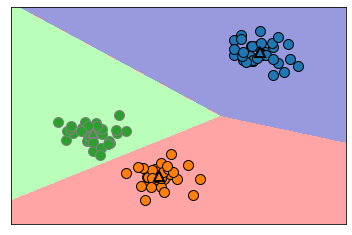

In [6]:
# K-means 알고리즘으로 찾은 클러스터 중심과 경계
mglearn.plots.plot_kmeans_boundaries()

[KMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
```
KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
```
Parameters:
- n_clusters : 군집화할 개수(군집 중심점의 개수를 의미)
- init : 군집 중심점의 좌표를 설정하는 방식
- max_iter : 최대 반복 횟수, 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

Attributes:
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표 ([군집 개수, 피처 개수] 모양으로 구성). 군집 중심점 좌표 시각화에 이용가능.

#### 군집(clustering) 실습 01

임의의 데이터로 K-means를 이용해 군집화 실습


In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)

# 군집 모델
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
print("클러스터 레이블 : ", kmeans.labels_)

클러스터 레이블 :  [0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [10]:
# 새로운 데이터의 클러스터 레이블을 예측
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


- 기존 훈련세트에 대해 predict를 실행하면 labels_와 같은 값을 얻게됨
- 각 데이터 포인트가 레이블(결과값)을 가진다는 면에서 분류와 조금 비슷
- 그러나 정답을 모르고 있으며 레이블 자체에 어떤 의미가 있지는 않음

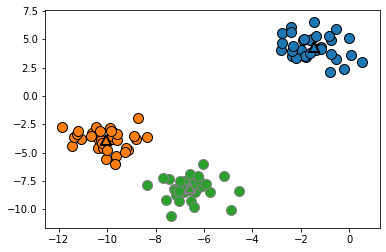

In [11]:
# 클러스터 중심을 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

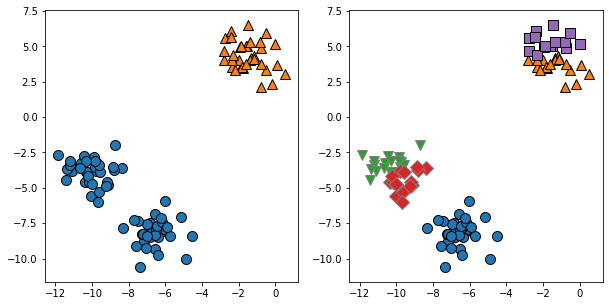

In [14]:
# 클러스터 수를 조정
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

#### 군집(clustering) 실습 02

Iris 데이터 k-means 군집화 실습


In [17]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [18]:
# KMeans


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
# labels_


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [20]:
# 실제 붓꽃 품종 분류와 차이를 확인


target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


- 타겟 0번은 모두 1번 군집으로 그룹화
- 타겟 1번은 2개만 0번 군집으로, 나머지는 2번 군집으로 그룹화
- 타겟 2번은 0번 군집으로 36개, 2번 군집으로 14개 그룹화

In [21]:
# 2차원 평면으로 군집 시각화 (차원축소이용)
from sklearn.decomposition import PCA



,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


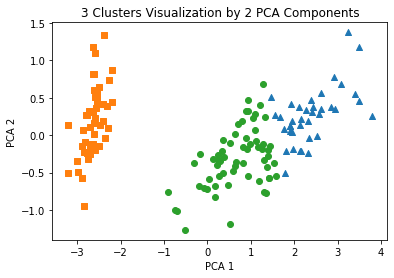

In [26]:
# 각 cluster 별 산점도 


#### K-means 알고리즘의 한계

- 클러스터 k를 직접 지정해줘야 하며, k의 값에 따라 결과 값이 완전히 달라질 수 있음
- 평균으로 계산하기 때문에 이상치에 민감
- 구형이 아닌 클러스터의 모양에는 적합치 않음
 - 클러스터의 중심으로부터의 거리를 측정하는 방식이기 때문


Text(0, 0.5, '특성 1')

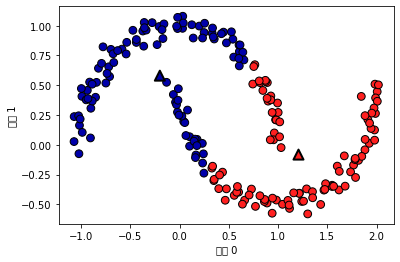

In [27]:
# two_moons 데이터를 생성합니다
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 병합적 군집(agglomerative clustering) 

- 유사한 특성을 지닌 데이터를 그리디(greedy)하게 묶어 이진 트리 형태로 만들어가는 방법
> *greedy : 현재 수준에서 주어진 조건을 가장 만족하는 후보자를 선택하는 정책

- 시작할 때 각 포인트를 하나의 클러스터로 지정하고 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클래스를 합침

- 계층적 군집의 한 종류





병합 군집(agglomerative clustering) 단계

1. 모든 데이터를 단일 클러스터로 정의
2. 각 클러스터 간 유사성을 계산
3. 유사성이 가장 높은 두 개의 클러스터를 합침
4. 2, 3단계를 클러스터가 1개가 될 때까지 반복


계층형 군집(Hierarchical Clustering)

- 계층적 트리 모형을 이용하여 개별 데이터 포인트들을 순차
적, 계층적으로 유사한 클러스터로 통합하여 군집화를 수행하는 알고리즘

- 계층형 군집 2가지
 - 병합적 군집(agglomerative clustering) : 상향식 군집
 - 분할적 군집(divisive clustering) : 하향식 군집

[AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)
```
AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
```
Parameters :
- n_clusters : 군집화할 개수
- linkage : 유사성을 측정하는 방법 지정
 - word(기본값) : 분산을 가장 작게 증가 시키는 두 클러스터를 합침 (크기가 비슷한 클러스터가 생성)
 - average : 평균 거리가 가장 짧은 두 클러스터를 합침
 - complete : 최대 거리가 가장 짧은 두 클러스터를 합침
 - single : 클러스터 포인트 사이의 최소 거리가 가장 짧은 두 클러스터를 합침 (scikit-learn 0.20 추가)


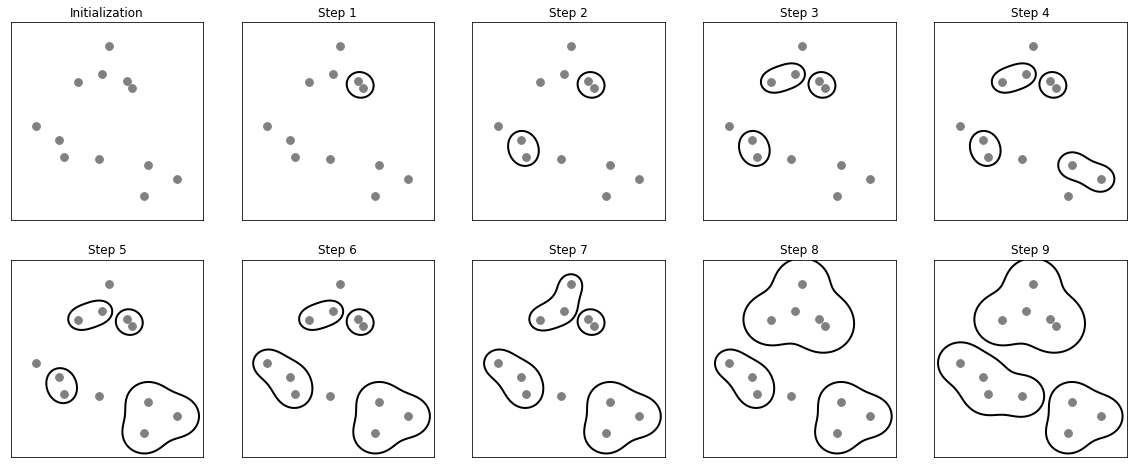

In [28]:
# 두 인접 클러스터를 반복적으로 합쳐나가는 병합 군집 과정(단계)
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

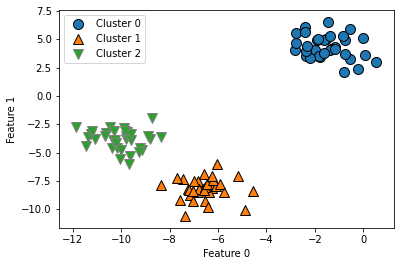

In [32]:
# 병합 군집을 사용한 클러스터 할당(예측)
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

덴드로그램 (dendrogram)
- 계층 군집을 시각화하는 도구인 덴드로그램은 다차원 데이터셋을 처리할 수 있음
- SciPy모듈 이용


Text(0, 0.5, '클러스터 거리')

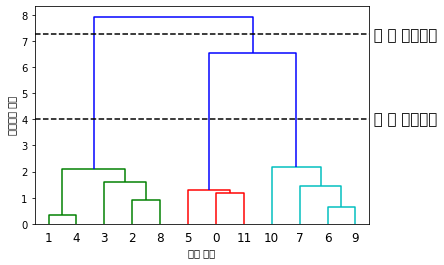

In [33]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# 데이터 배열 X 에 ward 함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴
linkage_array = ward(X)

# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램으로 시각화
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

- y축의 길이는 클러스터가 얼마나 멀리 떨어져 있는지를 나타냄
- 클러스터가 세 개에서 두 개로 될 때 꽤 먼 거리의 포인트를 모음

#### 군집(clustering) 실습 03

iris데이터를 활용한 병합 군집


In [47]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [48]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(df)

Text(0, 0.5, '클러스터 거리')

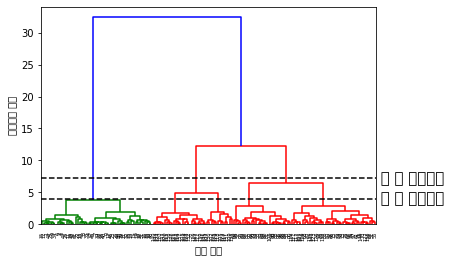

In [52]:
# 덴드로그램으로 시각화


In [53]:
# 2차원 평면으로 군집 시각화 (차원축소이용)
from sklearn.decomposition import PCA


,sepal_length,sepal_width,petal_length,petal_width,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949


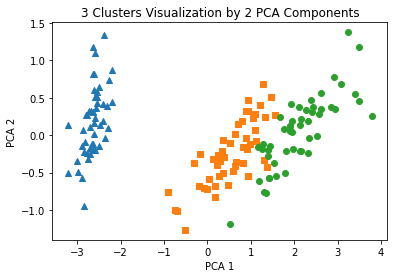

In [54]:
# 각 cluster 별 산점도 


## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

- 밀도 기반 군집화의 대표적인 알고리즘
- 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 함 
- 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행
- 밀도 있게 연결돼 있는(density-connected) 데이터 집합은 동일한 클러스터라고 판단




DBSCAN 데이터 포인트 정의

<center>
 <img src="https://datascienceschool.net/upfiles/3ee92719553b477fa941c84c0faebd34.png" alt="DBSCAN 데이터 포인트 정의" width="50%" />

</center>

- 핵심 포인트(Core Point) : 주변영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우

- 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터

- 경계 포인트(Border point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터

- 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

DBSCAN 군집화 과정

1. 어떤 학습데이터가 코어로 정의되면 주변의 이웃 점들을 차례로 방문하면서 각 점들이 코어인지 아닌지 판단
2. 코어이면 앞서 진행했던 방법과 마찬가지로 재귀적으로 반복하고 경계이면 진행을 중단
3. 중단되면 학습 데이터 세트에 있는 다음 점으로 다시 시작
 - 새로 시작할 때는 새로운 클러스터 레이블을 갖음


DBSCAN 장단점

- 클러스터의 개수를 미리 지정할 필요가 없음
- 복잡한 형상이나, 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있음(Noise)
- 병합 군집이나 K-means 보다 느리지만 비교적 큰 데이터셋에도 적용 가능

[DBSCAN()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
```
DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
```
Parameters :
- eps : 핵심 샘플 거리(반지름)
- min_samples : 클러스터내의 최소 데이터 개수
 - 1일 경우 모든 점이 클러스터가 됨
 - 2보다 작을 경우 : single link 계산법으로 구한 계층적 군집 방법과 같아지므로 적어도 3은 되어야 함



min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


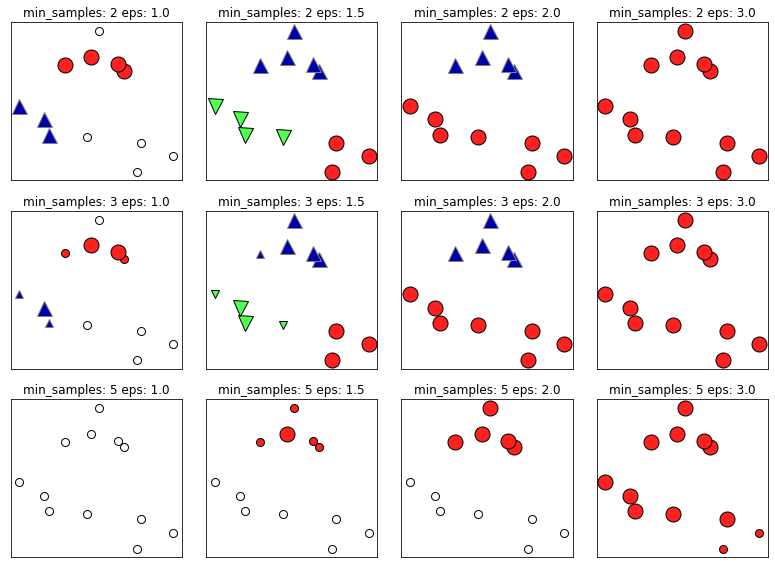

In [59]:
# min_samples와 eps 매개변수를 바꿔가며 DBSCAN으로 계산한 클러스터 할당(예측)
mglearn.plots.plot_dbscan()

- min_sample를 키우면 핵심 포인트 수가 줄어들며 잡음 포인트가 늘어남

- eps를 증가시키면 하나의 클러스터에 더 많은 포인트가 포함
 - 클러스터를 커지게 하지만 여러 클러스터를 하나로 합치게도 만듦
 - DBSCAN은 클러스터의 개수를 지정할 필요가 없지만 eps의 값은 간접적으로 몇 개의 클러스터가 만들어질지 제어 가능

#### 군집(clustering) 실습 04

구형이 아닌 클러스터의 모양에 DBSCAN 적용


Text(0, 0.5, '특성 1')

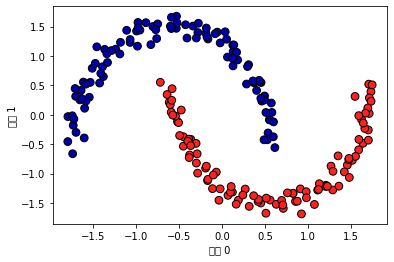

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# two_moons 데이터를 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 두 개의 클러스터로 데이터에 DBSCAN 알고리즘을 적용
# default eps=0.5
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# 클러스터 할당을 표시
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
            cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

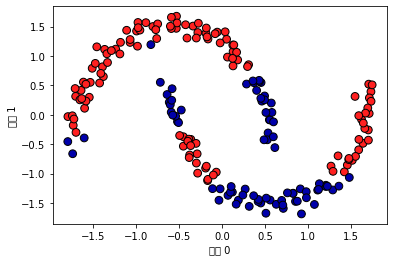

In [57]:
dbscan = DBSCAN(eps=0.2)
clusters = dbscan.fit_predict(X_scaled)

# 클러스터 할당을 표시
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
            cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

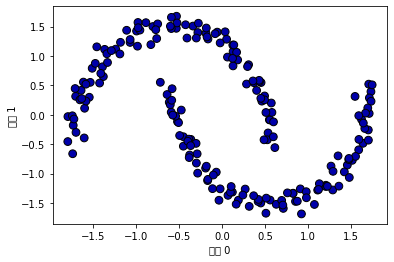

In [58]:
dbscan = DBSCAN(eps=0.7)
clusters = dbscan.fit_predict(X_scaled)

# 클러스터 할당을 표시
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
            cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 군집 알고리즘 평가

- 알고리즘이 잘 작동하는지 평가하기가 어려움

- ARI(adjusted rand index) : 군집 알고리즘의 결과를 실제 정답 클러스터와 비교하여 평가
 - 무작위로 클러스터에 포인트를 할당할 경우 ARI 값은 0에 가까워짐
 - 무작위 할당보다 나쁘게 군집되면 음수 값을 가질 수 있음

- 실루엣 분석(silhouette analysis) : 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 평가
 - 클러스터의 밀집 정도를 계산, 높을 수록 좋으며 최대 점수는 1
 - 실제로 잘 동작하지 않음


#### 타겟값으로 군집 평가

ARI(adjusted rand index)


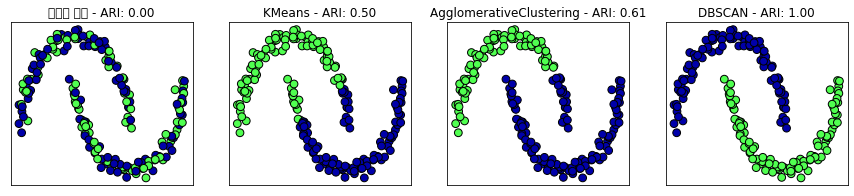

In [60]:
from sklearn.metrics.cluster import adjusted_rand_score

# two_moons 데이터를 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듦
algorithms = [KMeans(n_clusters=2), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 시각화
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

# 클러스터 할당과 클러스터 중심을 시각화
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

- two_moons 데이터셋에 적용한 무작위 할당, K-means, 병합군집, DBSCAN의 ARI 점수 비교
- DBSCAN은 완벽하게 군집을 만들어 냈으므로 점수가 1

In [61]:
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# 모든 레이블이 달라졌으므로 정확도는 0
print("정확도: {:.2f}".format(accuracy_score(clusters1, clusters2)))

# 같은 포인트가 클러스터에 모였으므로 ARI는 1
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

정확도: 0.00
ARI: 1.00


- 군집용 측정 도구를 이용
 - adjusted_rand_score()
 - normalized_mutual_info_score()

- 정확도를 사용하면 할당된 클러스터의 레이블 이름이 실제 레이블 이름과 맞는지 확인
- 클러스터 레이블은 그 자체로 의미가 있는 것이 아니며 포인트들이 같은 클러스터에 속해 있는가만이 중요

#### 타겟값 없이 군집 평가

실루엣 분석(silhouette analysis)


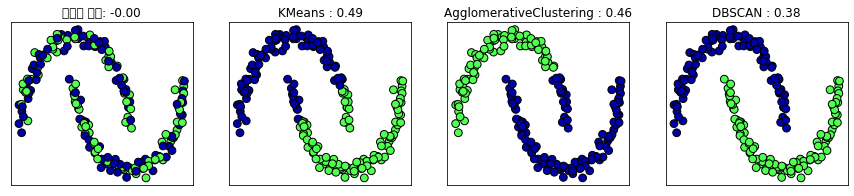

In [63]:
from sklearn.metrics.cluster import silhouette_score

# two_moons 데이터를 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듦
algorithms = [KMeans(n_clusters=2), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 시각화
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

 # 클러스터 할당과 클러스터 중심을 시각화
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

- two_moons 데이터셋에 적용한 무작위 할당, K-means, 병합군집, DBSCAN의 실루엣 점수 비교

- 더 나은 군집을 만든 DBSCAN의 실루엣 점수가 K-means 보다 낮음 (낮은 신뢰도)